In [1]:
%load_ext autoreload
%autoreload 2

## Regolamento

Tempi e consegna:

* Il tempo disponibile per lo svoligimento della prova è di 2 ore
* Al termine, il file `sol/brusselator.py` deve essere caricato su [EOL](https://eol.unibo.it/)

Materiale consultabile:

* È possibile consultare liberamente il materiale sul [sito del corso](https://virtuale.unibo.it/)
* È possible utilizzare fogli bianchi e penna/matita
* Non è possibile consultare od utilizzare altro materiale

Domande ammissibili:

* Domande di comprensione del testo possono essere fatte liberamente
* Domande sulla soluzione degli esercizi non avranno risposta

Indicazioni sulla codifica e valutazione:

* Le interfacce (nomi di classe, funzioni, parametri) vanno rispettate alla lettera
* La valutazione sarà semi-automatizzata e prenderà in considerazione solo le funzioni/classi richieste dagli esercizi
* Si suggerisce comunque di collaudare opportunamento il codice prodotto, al fine di evitare errori
* Eventuale codice che non esegue riceverà una valutazione nulla o molto bassa

## Contesto

***La reazione chimica di Belousov–Zhabotinsky...***

<center>
<img src="assets/brusselator.jpg" width=30%/>
</center>

...determina la formazione di pattern ricorrenti in movimento sulla superficie di una piastra di Petri. I
pattern sono dovuti al fatto che la reazione è autocatalitica, i.e. alcuni dei prodotti coincidono con alcuni dei reagenti. La reazione può essere studiata mediante il “Brusselator” (Brussels-Oscillator) un modello semplificato per le reazioni elementari:

$$\begin{align}
A & \to X \\
2X + Y & \to 3X \\
B + X & \to Y + D \\
X & \to E
\end{align}$$

Dove $A$ e $B$ sono due composti con concentrazione costante (o semplicemente molto abbondanti), mentre $X$ ed $Y$ sono i due composti che rendono la reazione auto-catalitica. $D$ ed $E$ sono due composti che non partecipano ad ulteriori reazioni.

**Formalmente, il Brusselator è un sistema dinamico**

Il suo stato può essere caratterizzato in termine delle concentrazioni dei composti $X$ e $Y$ ed il cui comportamento è definito dall'equazione differenziale:

$$\begin{align}
\dot{x} &= a  + x^2 y - b x - x \\
\dot{y} &= b x - x^2 y
\end{align}$$

Dove $a, b, x, y$ rappresentano le concentrazioni molari dei rispettivi composti. Mentre $a$ e $b$ sono costanti e note, $x$ e $y$ rappresentano lo stato del sistema.

## Esercizio 1

**Nel modulo `sol.brusselator` definire la classe**

```python
class Dstate:
    def __init__(self, a, b):
        ...
    
    def __call__(self, X, t):
        ...

```

* Il metodo `__call__` deve calcolare la funzione che definisce l'ODE
* I paramtetri del modello (i.e. $a$ e $b$) sono entrambi passati a tempo di costruzione
* Il metodo deve restituire un array `numpy` con le due componenti della derivata


**Nel modulo `sol.brusselator` si definisca quindi la funzione:**

```python
def simulate(a, b):
    x0 = [1, 1]
    t = np.linspace(0, 120, 10 * 120)
    ...
```

* La funzione deve risolvere un problema ai valori iniziali
* ...Con lo stato iniziale ed il vettore dei tempi indicati
* Il metodo deve restituire
  - La matrice con gli stati visitati
  - Il vettore dei tempi visitati

Si collaudi la funzione per $a = 0.4, b = 1.3$. Per verificare la correttezza dei risultati, può essere utile disegnare l'andamento dello stato usando la funzione `plot_state_evolution` nel modulo `base.util` incluso nel tema d'esame.

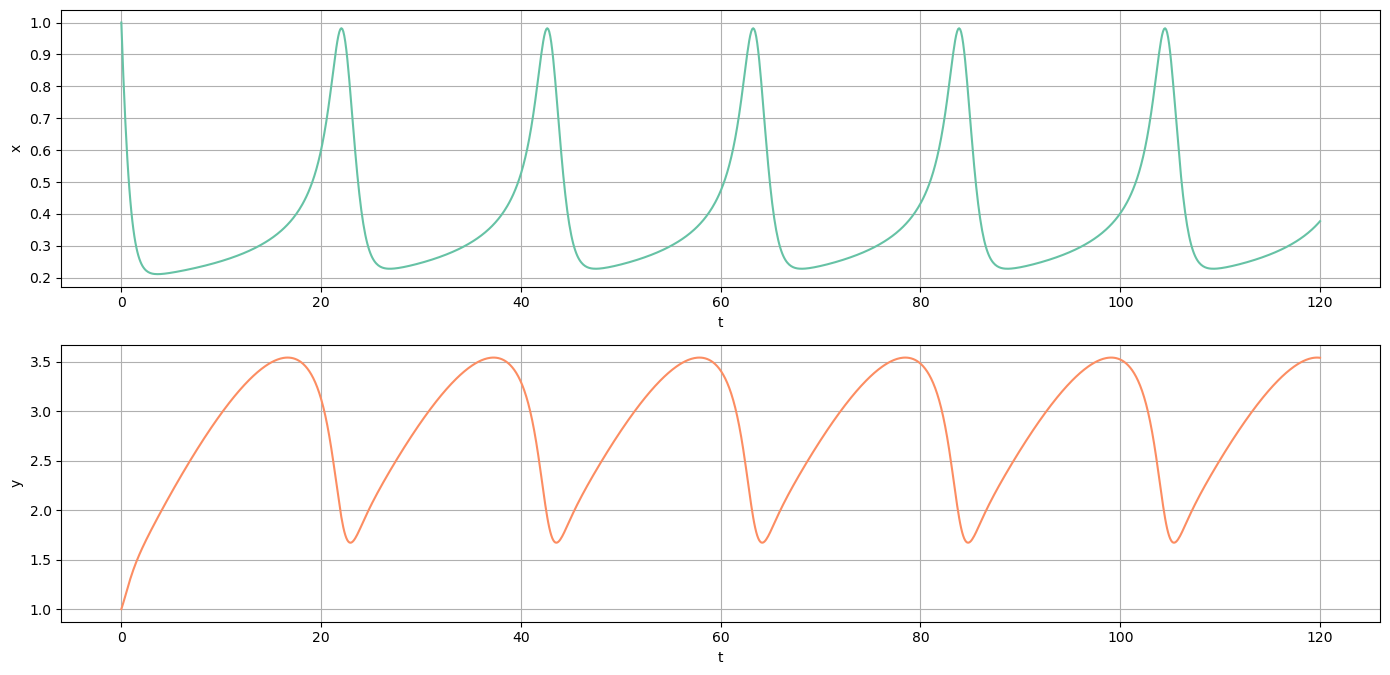

In [15]:
from sol import brusselator
from base import util

X, t = brusselator.simulate(a=0.4, b=1.3)
util.plot_state_evolution(X, t, xlabel='t', ylabels=['x', 'y'], figsize=(14, 7))

## Esercizio 2

**Il sistema ha un unico punto di equilibrio (tipicamente instabile)**

Questo può essere determinato imponendo che $\dot{x}$ e $\dot{y}$ siano entrambe nulle, i.e. risolvendo il sistema di equazioni non lineari:

$$\begin{align}
a  + x^2 y - b x - x &= 0\\
b x - x^2 y &= 0
\end{align}$$

Ossia trovando uno zero per la funzione vettoriale:

$$
F(X) = \left(\begin{array}{c}
a  + x^2 y - b x - x \\
b x - x^2 y
\end{array}\right)
$$

Con $X = (x, y)$

**Nel modulo `sol.brusselator` si definisca la funzione:**

```python
def find_eq_aux(X):
    a, b = 0.4, 1.3
    ...
```

* La funzione deve calcolare e restituire il valore di $F(X)$

**Nel modulo `sol.brusselator` si definisca la funzione:**

```python
def find_eq():
    ...
```

* La funzione deve utilizzare il metodo `scipy.optimize.fsolve` per determinare il punto di equilibrio
* La funzione deve valutare la convergenza di `solve`. In particolare, sia $X^*$ il vettore restituito da `fsolve`:
  - Se $\max(\text{abs}(F(x))) \leq 10^{-1}$ si considera la soluzione valida. In questo caso la funzione deve restituire (nell'ordine) il valore di $x$ e $y$ all'equilibrio
  - Altrimenti, la convergenza si considera non raggiunta. In questo caso la funzione deve restituire `None`

**Nota:** l'esercizio può essere svolto in modo indipendente dagli altri; opzionalmente, è possibile sfruttare il codice sviluppato nell'esercizio 1 per semplificare la soluzione

In [16]:
Xsol = brusselator.find_eq()
if Xsol is None:
    print('Nessuna soluzione trovata')
else:
    print(f'Punto di equilibrio: x = {Xsol[0]}, y = {Xsol[1]}')

Punto di equilibrio: x = 0.4, y = 3.249999999999999


## Esercizio 3

**È possibile controllare il punto di equilibrio scegliendo i valori di $a$ e $b$**

Questo può essere fatto imponendo che $\dot{x}$ e $\dot{y}$ siano entrambe nulle, come nell'esercizio 2, ma risolvendo il sistema in $a$ e $b$ anziché $x$ e $y$:

$$\begin{align}
a  + x^2 y - b x - x &= 0\\
b x - x^2 y &= 0
\end{align}$$

Si noti che il sistema è _lineare_ in $a$ e $b$ e può quindi essere riscritto nella forma:

$$
\left(\begin{array}{cc}
1 & - x \\
0 & 1
\end{array}\right)
\left(\begin{array}{c}
a \\
b
\end{array}\right)
=
\left(\begin{array}{c}
x - x^2y \\
x^2y
\end{array}\right)
$$

**Nel modulo `sol.brusselator` si definisca la funzione:**

```python
def control_eq(x, y):
    ...
```

* Dati dua valori di $x$ e $y$ in ingresso, rappresentati il punto di equilibrio desiderato, la funzione deve calcolare e restituire i valori di $a$ e $b$ corrispondenti
* Per risolvere il sistema lineare, si utilizzi `np.linalg.solve` (si noti che il sistema è in effetti molto facile da risolvere per via simbolica)
* La funzione deve restituire (nell'ordine) il valore di $a$ e $b$ determinati

Si collaudi la funzione determinando i valori di $a$ e $b$ per cui all'equilibrio vale $x = 1$ e $y = 1$.

In [17]:
brusselator.control_eq(x=1, y=1)

(1.0, 1.0)